ANÁLISIS DE DATOS FALTANTES Y CODIFICACIÓN
**texto en negrita**

DATASET: [ECOMMERCE - KAGGLE](https://www.kaggle.com/datasets/upam22/ecommerce-customer-churn-data)

01. INSTALACIÓN DE LIBRERIAS

In [3]:

!pip install kagglehub
!pip install pyjanitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 5.6 MB/s eta 0:00:00


02. IMPORTACIÓN DE LIBRERIAS

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import sklearn.compose
import sklearn.preprocessing
import janitor

03. CARGA DEL DATASET

In [5]:
path = kagglehub.dataset_download("upam22/ecommerce-customer-churn-data")
file = '/ecom_data.csv'

path_file = path + file

print("Path to dataset files:", path_file)

100%|██████████| 90.7k/90.7k [00:00<00:00, 43.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/upam22/ecommerce-customer-churn-data/versions/1/ecom_data.csv


In [6]:
ecommerce_df = pd.read_csv(path_file)
ecommerce_df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


04. CARGA DE  (pandas_missing_extension)

In [7]:
%run '/content/pandas_missing_extension.ipynb'

05. CONTEO DE VALORES NULOS

In [8]:
print(f'Total de valores: {ecommerce_df.size}')
print(f'Total de valores missing: {ecommerce_df.missing.number_missing()}')
print(f'Total de valores completos: {ecommerce_df.missing.number_complete()}')

Total de valores: 112600
Total de valores missing: 1856
Total de valores completos: 110744


por variable

In [9]:
ecommerce_df.missing.missing_variable_summary()


,variable,n_missing,n_cases,pct_missing
0,CustomerID,0,5630,0.000000
1,Churn,0,5630,0.000000
2,Tenure,264,5630,4.689165
3,PreferredLoginDevice,0,5630,0.000000
4,CityTier,0,5630,0.000000
5,WarehouseToHome,251,5630,4.458259
6,PreferredPaymentMode,0,5630,0.000000
7,Gender,0,5630,0.000000
8,HourSpendOnApp,255,5630,4.529307
9,NumberOfDeviceRegistered,0,5630,0.000000


In [10]:
ecommerce_df.missing.missing_variable_table()


,n_missing_in_variable,n_variables,pct_variables
0,0,13,65.0
1,251,1,5.0
2,255,1,5.0
3,256,1,5.0
4,258,1,5.0
5,264,1,5.0
6,265,1,5.0
7,307,1,5.0


grafica de valores nulos

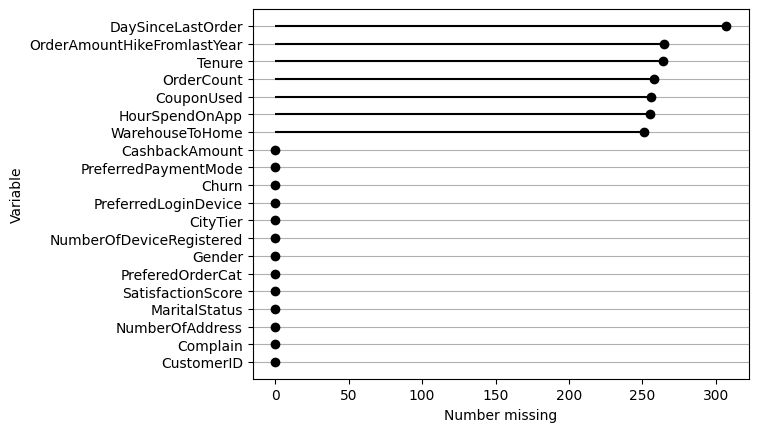

In [58]:
ecommerce_df.missing.missing_variable_plot()


In [26]:
ecommerce_df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
PreferredLoginDevice,object
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


# 06. IMPUTACIÓN DE DATOS FALTANTES


In [12]:
import missingno


<Axes: >

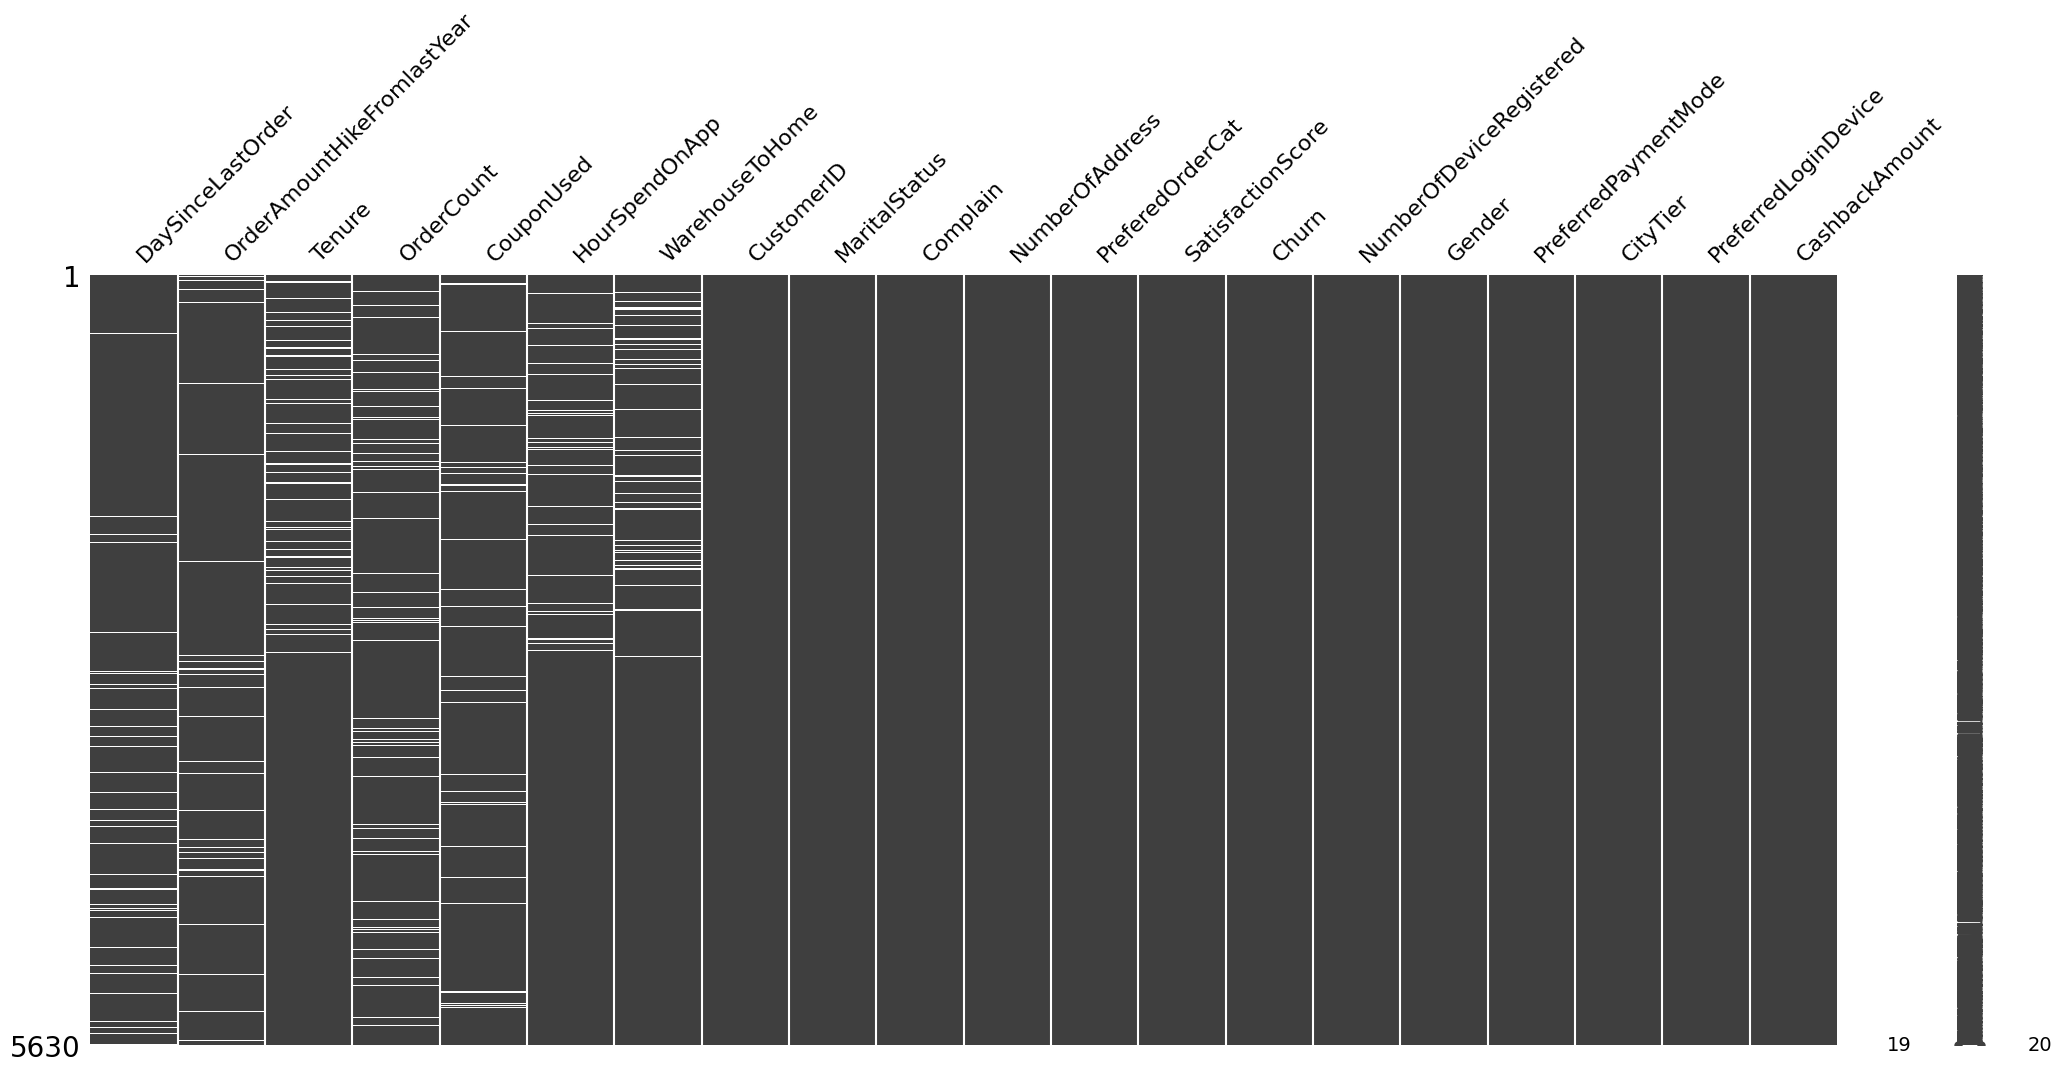

In [13]:
(
    ecommerce_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

# 6.1. IMPUTACIÓN DE DaySinceLastOrder:


In [19]:
df_day_since_last_order = ecommerce_df.copy()

In [20]:
df_day_since_last_order['DaySinceLastOrder'] = df_day_since_last_order['DaySinceLastOrder'].fillna(df_day_since_last_order['DaySinceLastOrder'].mean())
sorted_day_df = df_day_since_last_order.sort_values(
    by=['DaySinceLastOrder'],
    ascending=False
)
sorted_day_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2040,52041,1,0.0,Mobile Phone,3,6.0,Debit Card,Male,2.0,4,Fashion,3,Married,6,0,11.0,5.0,11.0,46.0,206
4305,54306,0,4.0,Mobile Phone,1,12.0,COD,Female,3.0,4,Mobile Phone,5,Married,7,0,15.0,1.0,3.0,31.0,157
1490,51491,0,3.0,Phone,1,11.0,COD,Female,2.0,3,Mobile,5,Married,6,0,14.0,0.0,2.0,30.0,132
3076,53077,0,11.0,Mobile Phone,1,21.0,Debit Card,Female,4.0,4,Mobile Phone,5,Married,3,0,13.0,4.0,13.0,18.0,155
3565,53566,0,18.0,Mobile Phone,1,36.0,UPI,Male,3.0,4,Laptop & Accessory,2,Single,3,0,26.0,2.0,2.0,18.0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,51363,0,0.0,Computer,1,22.0,CC,Male,NaN,1,Mobile,1,Married,2,1,13.0,0.0,1.0,0.0,129
1902,51903,0,8.0,Computer,1,8.0,Debit Card,Female,3.0,3,Laptop & Accessory,5,Married,3,0,11.0,1.0,1.0,0.0,151
573,50574,0,8.0,Phone,3,24.0,Credit Card,Female,2.0,3,Laptop & Accessory,3,Divorced,2,0,16.0,1.0,1.0,0.0,146
260,50261,1,NaN,Computer,1,10.0,COD,Male,2.0,3,Mobile,2,Single,19,1,23.0,1.0,1.0,0.0,123


In [21]:
print(f'Media original : {ecommerce_df["DaySinceLastOrder"].mean()} | Media sin nulos: {df_day_since_last_order["DaySinceLastOrder"].mean()}')


Media original : 4.543490512868683 | Media sin nulos: 4.543490512868684


# 6.2 IMPUTACION DE OrderAmountHikeFromlastYear

In [22]:
df_OrderAmountHikeFromlastYear = df_day_since_last_order.copy()

In [24]:
df_OrderAmountHikeFromlastYear['OrderAmountHikeFromlastYear'] = df_OrderAmountHikeFromlastYear['OrderAmountHikeFromlastYear'].fillna(df_OrderAmountHikeFromlastYear['OrderAmountHikeFromlastYear'].mean())
sorted_day_df = df_OrderAmountHikeFromlastYear.sort_values(
    by=['OrderAmountHikeFromlastYear'],
    ascending=False
)
sorted_day_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3761,53762,0,23.0,Mobile Phone,1,10.0,Credit Card,Female,3.0,5,Laptop & Accessory,5,Divorced,6,0,26.0,2.0,2.0,3.000000,173
5235,55236,0,6.0,Mobile Phone,1,17.0,Credit Card,Male,4.0,4,Fashion,1,Single,4,0,26.0,1.0,NaN,1.000000,237
5247,55248,0,8.0,Phone,3,14.0,COD,Male,3.0,4,Mobile Phone,3,Married,2,1,26.0,4.0,6.0,8.000000,148
3366,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.000000,165
2868,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,4.543491,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,51649,0,4.0,Mobile Phone,3,13.0,COD,Male,3.0,1,Laptop & Accessory,1,Married,5,0,11.0,3.0,7.0,7.000000,169
1658,51659,0,6.0,Computer,1,11.0,Debit Card,Female,3.0,3,Fashion,4,Married,7,0,11.0,7.0,8.0,4.543491,219
1664,51665,0,5.0,Mobile Phone,3,14.0,COD,Female,3.0,4,Laptop & Accessory,4,Married,2,1,11.0,11.0,11.0,9.000000,152
1665,51666,0,0.0,Phone,3,8.0,Debit Card,Male,3.0,3,Laptop & Accessory,3,Single,2,1,11.0,0.0,1.0,4.000000,145


In [30]:
print(f'Media original : {ecommerce_df["OrderAmountHikeFromlastYear"].mean()} | Media sin nulos: {df_OrderAmountHikeFromlastYear["OrderAmountHikeFromlastYear"].mean()}')

Media original : 15.707921714818266 | Media sin nulos: 15.707921714818266


# 6.2 IMPUTACION DE Tenure

In [41]:
df_tenure = df_OrderAmountHikeFromlastYear.copy()

In [42]:
df_tenure['Tenure'] = df_tenure['Tenure'].fillna(df_tenure['Tenure'].mean())
sorted_day_df = df_tenure.sort_values(
    by=['Tenure'],
    ascending=False
)
sorted_day_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,15.707922,1.0,2.0,1.0,304
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.000000,NaN,1.0,0.0,279
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.000000,2.0,3.0,9.0,174
928,50929,0,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.000000,1.0,2.0,8.0,149
4903,54904,0,31.0,Mobile Phone,1,9.0,Debit Card,Female,4.0,5,Grocery,1,Single,5,1,14.000000,NaN,5.0,4.0,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,52343,1,0.0,Phone,1,NaN,Debit Card,Female,2.0,3,Mobile,3,Single,2,1,13.000000,4.0,7.0,7.0,124
2343,52344,0,0.0,Phone,1,8.0,Credit Card,Male,2.0,4,Mobile Phone,1,Single,1,0,12.000000,1.0,1.0,1.0,139
1061,51062,1,0.0,Computer,3,18.0,UPI,Male,2.0,3,Laptop & Accessory,1,Single,4,1,24.000000,3.0,6.0,7.0,146
1053,51054,0,0.0,Phone,3,8.0,CC,Female,NaN,3,Mobile,3,Single,2,0,19.000000,0.0,2.0,2.0,128


In [43]:
print(f'Media original : {ecommerce_df["Tenure"].mean()} | Media sin nulos: {df_tenure["Tenure"].mean()}')

Media original : 10.189899366380917 | Media sin nulos: 10.189899366380917


# 6.3 IMPUTACION DE OrderCount

In [44]:
df_ordercount = df_tenure.copy()

In [45]:
df_ordercount['OrderCount'] = df_ordercount['OrderCount'].fillna(df_ordercount['OrderCount'].mean())
sorted_day_df = df_ordercount.sort_values(
    by=['OrderCount'],
    ascending=False
)
sorted_day_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4338,54339,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.000000,9.0,16.0,4.543491,230
3604,53605,0,29.0,Computer,1,15.0,Credit Card,Male,3.0,5,Grocery,4,Married,3,1,16.000000,4.0,16.0,1.000000,261
5097,55098,0,13.0,Mobile Phone,1,20.0,Credit Card,Female,4.0,5,Grocery,4,Married,8,1,15.707922,11.0,16.0,3.000000,296
5074,55075,0,29.0,Computer,1,15.0,Credit Card,Male,3.0,5,Grocery,4,Married,3,1,16.000000,3.0,16.0,1.000000,261
3627,53628,0,13.0,Mobile Phone,1,20.0,Credit Card,Female,4.0,5,Grocery,4,Married,8,1,15.707922,14.0,16.0,3.000000,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,51817,0,11.0,Mobile Phone,1,16.0,Credit Card,Female,3.0,3,Laptop & Accessory,3,Married,4,0,19.000000,0.0,1.0,0.000000,198
1818,51819,0,22.0,Mobile Phone,1,24.0,Debit Card,Male,2.0,4,Others,3,Married,2,1,15.707922,1.0,1.0,9.000000,295
1819,51820,0,0.0,Phone,1,29.0,CC,Male,NaN,1,Mobile,1,Married,2,1,11.000000,0.0,1.0,4.000000,127
1820,51821,0,0.0,Mobile Phone,3,34.0,E wallet,Male,3.0,3,Laptop & Accessory,4,Married,2,0,20.000000,0.0,1.0,4.000000,163


In [46]:
print(f'Media original : {ecommerce_df["OrderCount"].mean()} | Media sin nulos: {df_ordercount["OrderCount"].mean()}')

Media original : 3.0080044676098288 | Media sin nulos: 3.0080044676098288


# 6.4. IMPUTACION DE CouponUsed

In [47]:
df_CouponUsed = df_ordercount.copy()

In [48]:
df_CouponUsed['CouponUsed'] = df_CouponUsed['CouponUsed'].fillna(df_CouponUsed['CouponUsed'].mean())
sorted_day_df = df_CouponUsed.sort_values(
    by=['CouponUsed'],
    ascending=False
)
sorted_day_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4585,54586,0,24.000000,Mobile Phone,1,36.0,Debit Card,Male,3.0,5,Grocery,3,Married,2,0,15.707922,16.0,16.0,8.0,295
3442,53443,1,1.000000,Mobile Phone,1,23.0,Debit Card,Female,3.0,2,Mobile Phone,5,Single,3,0,17.000000,16.0,16.0,15.0,152
627,50628,1,0.000000,Phone,1,22.0,Debit Card,Female,NaN,1,Mobile,5,Single,2,0,16.000000,15.0,15.0,14.0,127
3627,53628,0,13.000000,Mobile Phone,1,20.0,Credit Card,Female,4.0,5,Grocery,4,Married,8,1,15.707922,14.0,16.0,3.0,296
3343,53344,0,24.000000,Computer,1,9.0,Debit Card,Male,4.0,4,Grocery,5,Married,3,0,15.707922,14.0,15.0,8.0,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,52744,0,6.000000,Computer,1,13.0,Debit Card,Male,2.0,3,Laptop & Accessory,3,Married,2,0,20.000000,0.0,2.0,8.0,160
1078,51079,0,26.000000,Mobile Phone,1,30.0,Credit Card,Male,2.0,1,Fashion,1,Married,4,0,15.000000,0.0,1.0,2.0,170
2741,52742,1,16.000000,Mobile Phone,3,30.0,Debit Card,Male,3.0,3,Fashion,5,Single,7,1,13.000000,0.0,2.0,2.0,204
2740,52741,1,0.000000,Computer,3,32.0,E wallet,Male,3.0,3,Laptop & Accessory,1,Married,2,1,11.000000,0.0,1.0,8.0,156


In [49]:
print(f'Media original : {ecommerce_df["CouponUsed"].mean()} | Media sin nulos: {df_CouponUsed["CouponUsed"].mean()}')

Media original : 1.7510234462225531 | Media sin nulos: 1.7510234462225531


# 6.5. IMPUTACION DE HourSpendOnApp

In [50]:
df_HourSpendOnApp = df_CouponUsed.copy()

In [51]:
df_HourSpendOnApp['HourSpendOnApp'] = df_HourSpendOnApp['HourSpendOnApp'].fillna(df_HourSpendOnApp['HourSpendOnApp'].mean())
sorted_day_df = df_HourSpendOnApp.sort_values(
    by=['HourSpendOnApp'],
    ascending=False
)
sorted_day_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4248,54249,0,4.000000,Mobile Phone,1,9.0,Debit Card,Male,5.0,5,Laptop & Accessory,1,Married,3,0,20.0,4.000000,11.000000,9.000000,167
4351,54352,0,1.000000,Phone,1,16.0,Credit Card,Female,5.0,4,Mobile Phone,4,Single,3,0,17.0,1.000000,2.000000,4.000000,148
4223,54224,0,31.000000,Mobile Phone,3,32.0,Debit Card,Female,5.0,4,Fashion,5,Single,9,0,12.0,7.000000,8.000000,10.000000,201
4162,54163,1,1.000000,Phone,1,9.0,UPI,Male,4.0,5,Mobile Phone,3,Single,8,1,16.0,1.000000,2.000000,1.000000,146
4142,54143,1,14.000000,Computer,3,7.0,Debit Card,Male,4.0,4,Laptop & Accessory,3,Married,9,0,13.0,2.000000,2.000000,2.000000,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,50048,0,10.189899,Computer,1,9.0,CC,Male,1.0,3,Mobile,4,Single,5,0,12.0,4.000000,7.000000,2.000000,121
2212,52213,0,23.000000,Computer,1,8.0,Credit Card,Female,1.0,3,Grocery,5,Married,3,0,22.0,1.751023,2.000000,2.000000,279
150,50151,0,10.000000,Computer,1,6.0,Credit Card,Female,0.0,3,Fashion,2,Married,3,1,18.0,0.000000,3.008004,2.000000,236
1950,51951,0,11.000000,Computer,1,18.0,Debit Card,Male,0.0,4,Laptop & Accessory,5,Married,3,0,15.0,1.000000,1.000000,2.000000,163


In [52]:
print(f'Media original : {ecommerce_df["CouponUsed"].mean()} | Media sin nulos: {df_HourSpendOnApp["HourSpendOnApp"].mean()}')

Media original : 1.7510234462225531 | Media sin nulos: 2.9315348837209303


# 6.6. IMPUTACION DE WarehouseToHome

In [53]:
df_WarehouseToHome = df_HourSpendOnApp.copy()

In [54]:
df_WarehouseToHome['WarehouseToHome'] = df_WarehouseToHome['WarehouseToHome'].fillna(df_WarehouseToHome['WarehouseToHome'].mean())
sorted_day_df = df_WarehouseToHome.sort_values(
    by=['WarehouseToHome'],
    ascending=False
)
sorted_day_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.000000,2.0,2.0,1.000000,160
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.000000,1.0,1.0,0.000000,135
3727,53728,0,19.0,Mobile Phone,1,36.0,Cash on Delivery,Male,3.0,4,Fashion,1,Divorced,6,1,19.000000,2.0,2.0,4.543491,219
3438,53439,1,1.0,Computer,3,36.0,Credit Card,Male,4.0,6,Laptop & Accessory,5,Single,10,0,19.000000,1.0,3.0,3.000000,175
2889,52890,0,12.0,Mobile Phone,1,36.0,COD,Male,3.0,4,Laptop & Accessory,2,Divorced,5,0,19.000000,1.0,2.0,8.000000,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,51402,0,8.0,Computer,3,5.0,Debit Card,Male,3.0,3,Fashion,5,Married,2,0,22.000000,0.0,1.0,8.000000,191
451,50452,0,2.0,Computer,3,5.0,E wallet,Male,2.0,3,Laptop & Accessory,2,Divorced,1,0,19.000000,0.0,1.0,1.000000,143
1001,51002,0,23.0,Mobile Phone,3,5.0,E wallet,Male,2.0,3,Others,3,Married,5,1,15.707922,0.0,1.0,0.000000,293
3490,53491,1,1.0,Computer,1,5.0,Credit Card,Male,3.0,5,Mobile Phone,4,Married,3,0,16.000000,1.0,2.0,1.000000,151


In [56]:
print(f'Media original : {ecommerce_df["WarehouseToHome"].mean()} | Media sin nulos: {df_WarehouseToHome["WarehouseToHome"].mean()}')

Media original : 15.639895891429633 | Media sin nulos: 15.639895891429632


# 7. VALIDACION DE DF FINAL Y LIMPIO DE MISSING

In [57]:
ecommerce_df_clean = df_WarehouseToHome.copy()

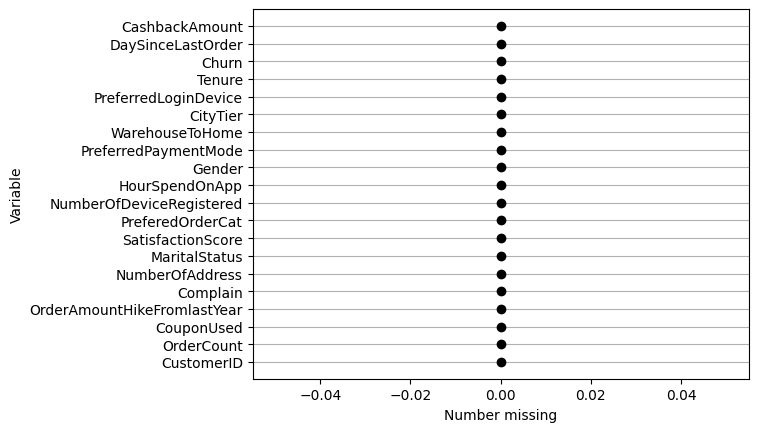

In [59]:
ecommerce_df_clean.missing.missing_variable_plot()


In [60]:
ecommerce_df_clean.dtypes.value_counts()


,count
int64,8
float64,7
object,5


In [63]:
# prompt: solo mostrar los campos de tipo object del ecommerce_df_clean
ecommerce_df_clean.select_dtypes(include=['object']).dtypes


,0
PreferredLoginDevice,object
PreferredPaymentMode,object
Gender,object
PreferedOrderCat,object
MaritalStatus,object


# 08 VERIFICACIÓN DE CATEGORIAS DE CADA VARIABLE CATEGORICA:


In [64]:
ecommerce_df_clean['PreferredLoginDevice'].value_counts()


,count
PreferredLoginDevice,
Mobile Phone,2765
Computer,1634
Phone,1231


In [65]:
ecommerce_df_clean['PreferredPaymentMode'].value_counts()


,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1501
E wallet,614
UPI,414
COD,365
CC,273
Cash on Delivery,149


In [66]:
ecommerce_df_clean['Gender'].value_counts()


,count
Gender,
Male,3384
Female,2246


In [68]:
ecommerce_df_clean['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Laptop & Accessory,2050
Mobile Phone,1271
Fashion,826
Mobile,809
Grocery,410
Others,264


In [69]:
ecommerce_df_clean['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2986
Single,1796
Divorced,848


08.3. CODIFICACIÓN CON SKLEARN Y ONE HOT:

In [70]:

transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(), ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','MaritalStatus']),
    (sklearn.preprocessing.OneHotEncoder(), ['PreferedOrderCat']),
    remainder='passthrough'
)

In [71]:
eco_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(ecommerce_df_clean),
        columns=transformer.get_feature_names_out(),
        index=ecommerce_df_clean.index
    )
    .rename_columns(
        function = lambda x: x.removeprefix("ordinalencoder__")
    )
    .rename_columns(
        function = lambda x: x.removeprefix("onehotencoder__order_category_")
    )
    .rename_columns(
        function = lambda x: x.removeprefix("remainder__")
    )
)


/usr/local/lib/python3.11/dist-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,PreferredLoginDevice,PreferredPaymentMode,Gender,MaritalStatus,onehotencoder__PreferedOrderCat_Fashion,onehotencoder__PreferedOrderCat_Grocery,onehotencoder__PreferedOrderCat_Laptop & Accessory,onehotencoder__PreferedOrderCat_Mobile,onehotencoder__PreferedOrderCat_Mobile Phone,onehotencoder__PreferedOrderCat_Others,...,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.000000,160.0
1,2.0,6.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.000000,121.0
2,2.0,4.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.000000,120.0
3,2.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.000000,134.0
4,2.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.000000,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.000000,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.000000,151.0
5626,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.000000,5.0,5.0,6.0,0.0,16.0,1.0,2.0,4.543491,225.0
5627,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.000000,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.000000,186.0
5628,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.000000,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.000000,179.0


In [72]:
eco_transformed_df.head(5)


,PreferredLoginDevice,PreferredPaymentMode,Gender,MaritalStatus,onehotencoder__PreferedOrderCat_Fashion,onehotencoder__PreferedOrderCat_Grocery,onehotencoder__PreferedOrderCat_Laptop & Accessory,onehotencoder__PreferedOrderCat_Mobile,onehotencoder__PreferedOrderCat_Mobile Phone,onehotencoder__PreferedOrderCat_Others,...,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,2.0,6.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,2.0,4.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,2.0,4.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,2.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
